In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

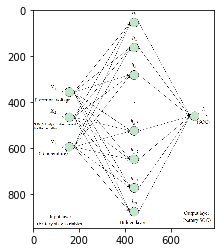

In [5]:
image = cv2.imread('test.png')
plt.imshow(image)


In [8]:
import numpy
dir(numpy)


['__doc__', '__loader__', '__name__', '__package__', '__path__', '__spec__']

In [2]:
# GRADED FUNCTION: train_mnist
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE
    class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > 0.99):
          print("\nReached 99% accuracy so cancelling training!")
          self.model.stop_training = True
                
    callbacks = myCallback()
    # YOUR CODE SHOULD END HERE

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)
    # YOUR CODE SHOULD START HERE
    x_train, x_test = x_train/255.0, x_test/255.0
    # YOUR CODE SHOULD END HERE
    model = tf.keras.models.Sequential([
        # YOUR CODE SHOULD START HERE
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # YOUR CODE SHOULD END HERE
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    history = model.fit(# YOUR CODE SHOULD START HERE
                        x_train, y_train, epochs=10, callbacks=[callbacks]
              # YOUR CODE SHOULD END HERE
    )
    # model fitting
    return history.epoch, history.history['acc'][-1]